In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('RS.txt', names=['ID','Timestep','Front','Rear'])
train.head()

,ID,Timestep,Front,Rear
0,1,0,56,85
1,1,1,56,83
2,1,2,54,86
3,1,3,55,83
4,1,4,54,84


In [3]:
labels = np.zeros(len(train))
startw = [461,  1795, 3424, 5023, 6733, 8391]
endw =   [1502, 2275, 4450, 6074, 7760, 9436]
for s,e in zip(startw,endw):
    labels[range(s,e)] = 1

In [4]:
train['Label'] = pd.Series(labels, index=train.index)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

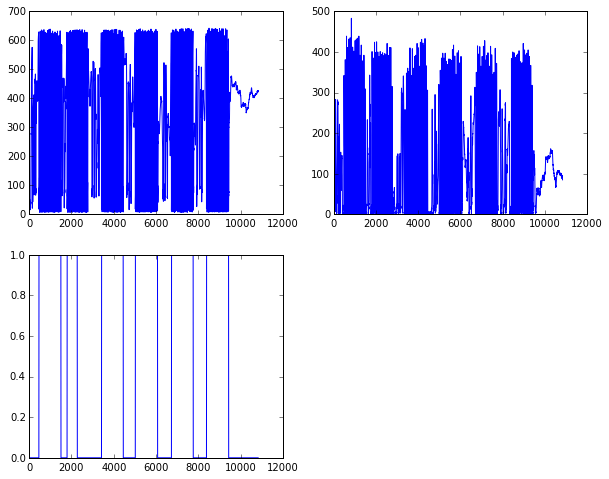

In [21]:
plt.figure(figsize=(10,8))
plt.subplot(221)
plt.plot(train.Front)
plt.subplot(222)
plt.plot(train.Rear)
plt.subplot(223)
plt.plot(train.Label)

### Existing labels

Note: 2275 - ~3000 doesn't look like 'stopped'!

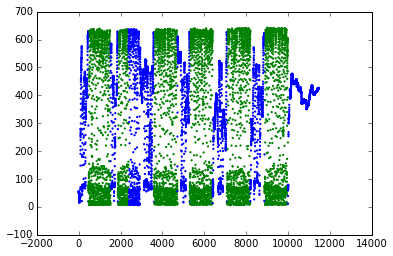

In [23]:
plt.scatter(train.Timestep, 
            train.Front, 
            marker='.', 
            linewidth=0, 
            c=['blue' if x == 0 else 'green' for x in train.Label])

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
training_features = [np.append(abs(np.fft.fft(train.Front[x:x+60]))[0:6], abs(np.fft.fft(train.Rear[x:x+60]))[0:6]) for x in range(0, len(train)-60)]

In [10]:
scaler = StandardScaler()

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11, weights='uniform')
knn.fit(scaler.fit_transform(training_features), train.Label[60:]) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=11, p=2, weights='uniform')

In [12]:
test = pd.read_csv('RS_test.txt', names=['ID','Timestep','Front','Rear'])
test.head()

,ID,Timestep,Front,Rear
0,1,1820,408,80
1,1,1821,409,80
2,1,1822,409,81
3,1,1823,408,80
4,1,1824,407,83


In [13]:
testing_features = [np.append(abs(np.fft.fft(test.Front[x:x+60]))[0:6], abs(np.fft.fft(test.Rear[x:x+60]))[0:6]) for x in range(0, len(test)-60)]

In [14]:
test_prediction = knn.predict(scaler.fit_transform(testing_features))

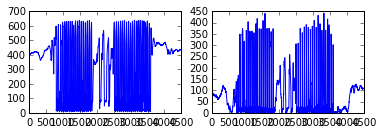

In [15]:
plt.subplot(221)
plt.plot(test.Front)
plt.subplot(222)
plt.plot(test.Rear)

In [16]:
test_points = test[60:]

### Result of prediction

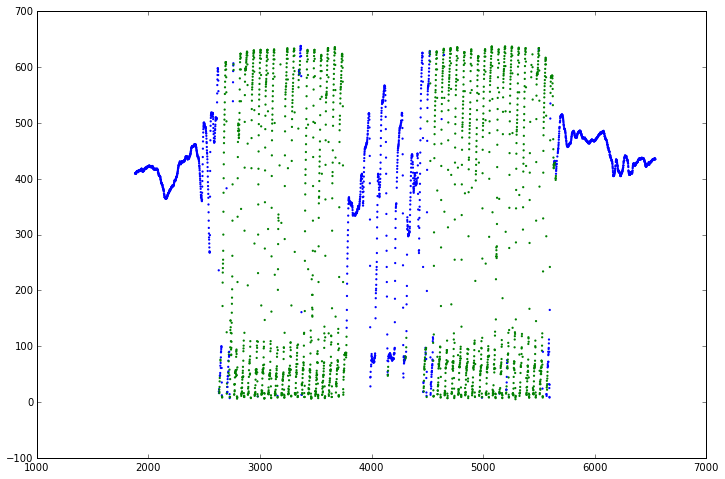

In [17]:
plt.figure(figsize=(12,8))
plt.scatter(test_points.Timestep, test_points.Front, marker='.', linewidth=0, c=['blue' if x == 0 else 'green' for x in test_prediction])